In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib inline


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from skimage import *
from sklearn.model_selection import train_test_split

IMG_SIZE = 28
NUMCLASSES = 10

trainfile = r'..\data\MNIST\train.csv'
testfile = r'..\data\MNIST\test.csv'


In [3]:
trainDF = pd.read_csv(trainfile)
testDF = pd.read_csv(testfile)

trainlabels = np.asarray(trainDF.label)
traindigits = np.asarray(trainDF)
traindigits = traindigits[:,1:]

traindigits, valdigits, trainlabels, vallabels = train_test_split(traindigits, trainlabels, test_size=0.2, random_state=42)

testdigits = np.asarray(testDF)

trainDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def digit(arr):
    return arr.reshape(IMG_SIZE, IMG_SIZE)

def make_labels(label):
    labels = np.zeros([NUMCLASSES],np.uint8)
    labels[label] = 1
    return labels
    
def train_data_with_label():
    train_images = []
    for i in range(traindigits.shape[0]):
        img = digit(traindigits[i,:])
        train_images.append([img, make_labels(trainlabels[i])])
    #shuffle(train_images)
    return train_images

def validation_data_with_label():
    validation_images = []
    for i in range(valdigits.shape[0]):
        img = digit(valdigits[i,:])
        validation_images.append([img, make_labels(vallabels[i])])
    #shuffle(validation_images)
    return validation_images
    

In [5]:
make_labels(7)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [6]:
training_images = train_data_with_label()
validation_images = validation_data_with_label()

print((np.array(training_images)).shape)
print((np.array(validation_images)).shape)


(33600, 2)
(8400, 2)


<ipython-input-6-45666c38a6e7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print((np.array(training_images)).shape)
<ipython-input-6-45666c38a6e7>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print((np.array(validation_images)).shape)


In [7]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
tr_lbl_data = np.array([i[1] for i in training_images])
val_img_data = np.array([i[0] for i in validation_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
val_lbl_data = np.array([i[1] for i in validation_images])


In [8]:
model = Sequential()

model.add(InputLayer(input_shape=[IMG_SIZE,IMG_SIZE,1])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUMCLASSES,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [9]:
#Training
# history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=25,batch_size=700,validation_data=(val_img_data,val_lbl_data),verbose=1)
# model.save_weights("mymodel.h5")

In [10]:
model.load_weights("mymodel.h5")

In [11]:
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_accuracy'],color='cyan')
plt.show()

NameError: name 'history' is not defined

<Figure size 576x288 with 0 Axes>

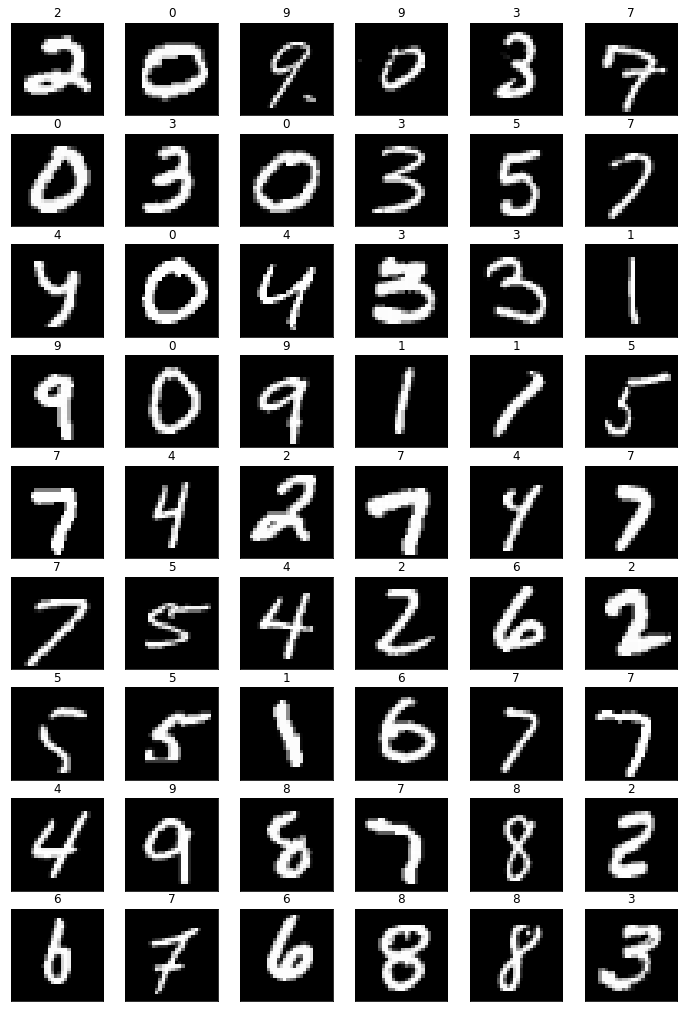

In [12]:
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(testdigits.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    img = digit(testdigits[i,:])
    img = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict(img)
    #print(np.uint16(model_out*100)/100)
    str_label= str(np.argmax(model_out))
    
    y.imshow(digit(testdigits[i,:]),cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()


# Now we will visualize response maps

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [14]:
img_size = (IMG_SIZE,IMG_SIZE)

last_conv_layer_name = "conv2d_1"
classifier_layer_names = ["max_pooling2d_1","dropout_1", "flatten", "dense","dropout_2","dense_1" ]


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint


# def get_img_array(img_path,size):
#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(trainImagesX.shape[1], trainImagesX.shape[2]))
#     img /= np.amax(img)
#     img_tensor = tf.keras.preprocessing.image.img_to_array(img)
#     img_tensor = np.expand_dims(img_tensor, axis=0)
#     #img_tensor /= 255.
#     return img_tensor
        


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)


    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as gt:
        # Compute activations of the last conv layer and make the gt watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        gt.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = gt.gradient(top_class_channel, last_conv_layer_output)
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap)+np.finfo(float).eps)
    return heatmap



(1, 28, 28, 1)
Predicted: 9


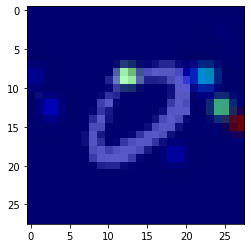

In [16]:
import matplotlib.cm as cm


# Print what the top predicted class is
img = digit(testdigits[3,:])
img_array = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
print(img_array.shape)
preds = model.predict(img_array,steps=1)
print("Predicted:", np.argmax(preds))


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)
# plt.imshow(heatmap)
        
    # We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
img = np.stack((img, img, img),axis=2)
superimposed_img = jet_heatmap + img * 0.4
superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
plt.imshow(superimposed_img)

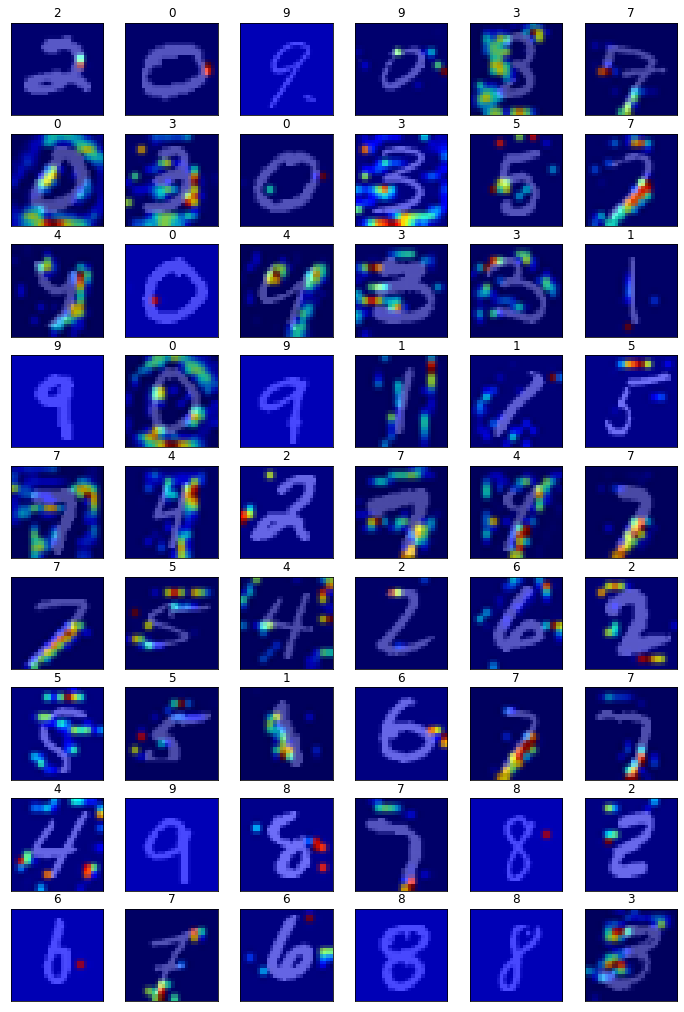

In [17]:
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(testdigits.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    img = digit(testdigits[i,:])
    img_array = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
#     print(img_array.shape)
    preds = model.predict(img_array,steps=1)
#     print("Predicted:", np.argmax(preds))


    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)
    # plt.imshow(heatmap)

        # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

        # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

        # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

        # We create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

        # Superimpose the heatmap on original image
    img = np.stack((img, img, img),axis=2)
    superimposed_img = jet_heatmap + img * 0.4
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    model_out = model.predict(img_array)
    #print(np.uint16(model_out*100)/100)
    str_label= str(np.argmax(model_out))
    
    y.imshow(superimposed_img)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()
